In [1]:
import dhlab.nbtext as nb


In [21]:
from dhlab.nbtext import nb_ngram

def difference(first, second, rf, rs, years=(1980, 2000),smooth=1, corpus='bok', mode='a'):
    """Compute difference of difference (first/second)/(rf/rs)"""
    try:
        a_first = nb_ngram(first, years=years, smooth=smooth, corpus=corpus, mode=mode)
        a_second = nb_ngram(second, years=years, smooth=smooth, corpus=corpus,mode=mode)
        a = a_first.join(a_second)  
        b_first = nb_ngram(rf, years=years, smooth=smooth, corpus=corpus,mode=mode)
        b_second = nb_ngram(rs, years=years, smooth=smooth, corpus=corpus,mode=mode)
        if rf == rs:
            b_second.columns = [rs + '2']
        b = b_first.join(b_second)
        s_a = a.sum()
        s_b = b.sum()
        f1 = s_a[a.columns[0]]/s_a[a.columns[1]]
        f2 = s_b[b.columns[0]]/s_b[b.columns[1]]
        res = f1/f2
    except:
        res = 'Mangler noen data - har bare for: ' + ', '.join([x for x in a.columns.append(b.columns)])
    return f"{round(res,2)} for {first} vs {second}"

In [3]:
def phrase(masc, fem, construction, period=(1950, 2010), media='avis', mode='a'):
    res = difference(masc, fem, construction(masc), construction(fem), years=period, corpus=media, mode='a')
    print(res)
    nb.nb_ngram("{cm}, {cf}".format(cm=construction(masc), cf=construction(fem) ),smooth=1, corpus=media, years= period).sort_index().plot(figsize=(10,5), lw=3)
    return res

def phrase_dev(masc, fem, construction, period=(1950, 2010), step = 2, media='avis'):
    res = {
        x:difference(masc, fem, construction(masc), construction(fem), years=(x, x+step), corpus=media, mode='a') 
        for x in range(period[0], period[1], step)
    }           
    return res

4.14 for han vs hun


'4.14 for han vs hun'

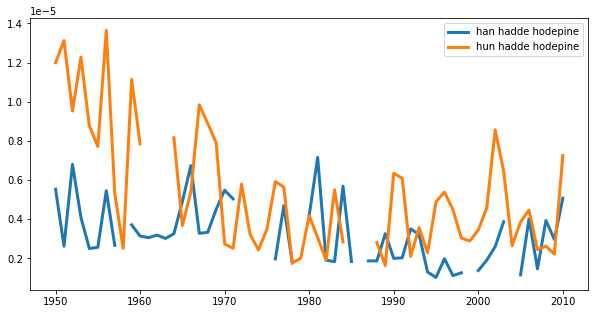

In [22]:
phrase('han', 'hun', lambda x: x + " hadde hodepine", media="bok")

Mangler noen data - har bare for: han, hun, hun var hysterisk


'Mangler noen data - har bare for: han, hun, hun var hysterisk'

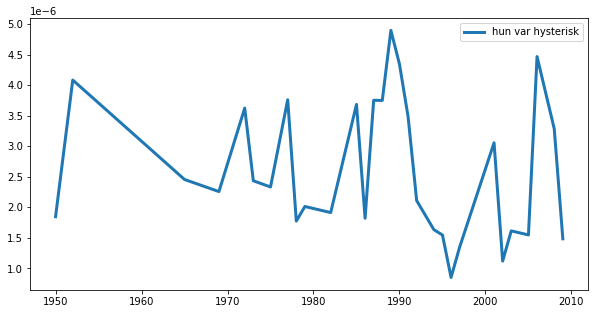

In [5]:
phrase('han', 'hun', lambda x: x + ' var hysterisk', media = 'bok')

1.24 for ham vs henne


'1.24 for ham vs henne'

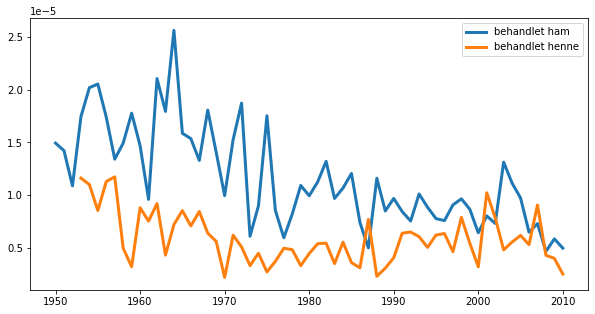

In [23]:
phrase('ham', 'henne', lambda x: 'behandlet ' + x, media = 'avis')

Mangler noen data - har bare for: hans, hennes, kreften hennes


'Mangler noen data - har bare for: hans, hennes, kreften hennes'

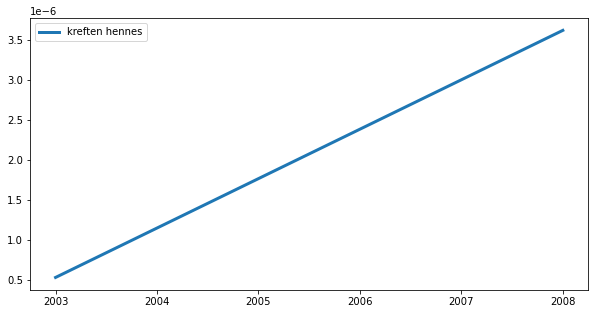

In [7]:
phrase('hans', 'hennes', lambda x: 'kreften ' + x, media = 'avis')

0.972506016354564


0.972506016354564

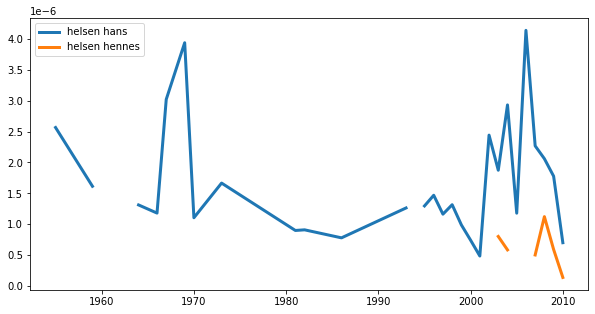

In [8]:
phrase('hans', 'hennes', lambda x: 'helsen ' + x, media = 'avis')

2.8351065049230466


2.8351065049230466

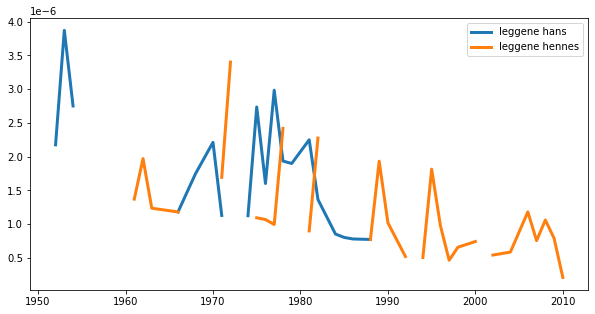

In [9]:
phrase('hans', 'hennes', lambda x: 'leggene ' + x, media = 'avis')

2.7079188147015603


2.7079188147015603

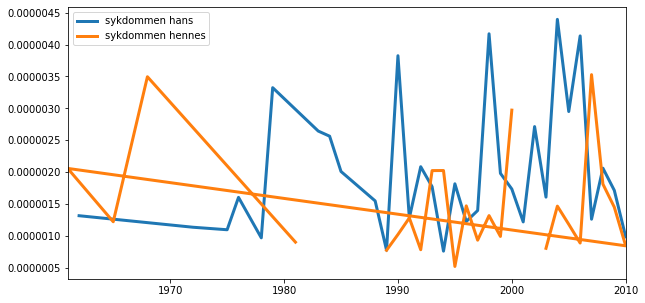

In [10]:
phrase('hans','hennes', lambda x: "sykdommen " + x)

2.5374777099872774


2.5374777099872774

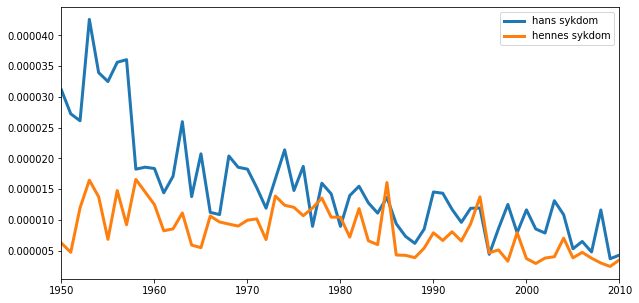

In [11]:
phrase('hans','hennes', lambda x: x + " sykdom")

1.7568154171656278


1.7568154171656278

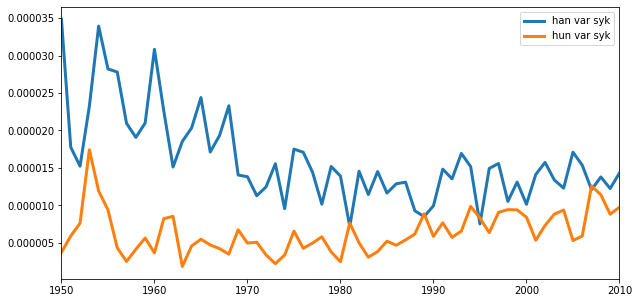

In [12]:
phrase('han','hun', lambda x: x + " var syk")

2.368264522802221


2.368264522802221

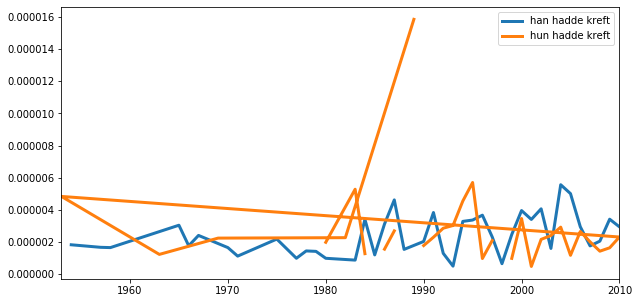

In [13]:
phrase('han','hun', lambda x: x + " hadde kreft")

2.368264522802221


2.368264522802221

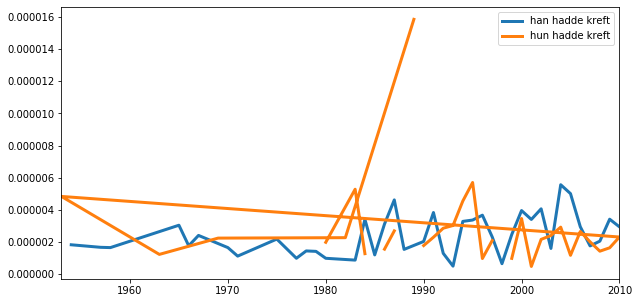

In [14]:
phrase('han','hun', lambda x: x + " hadde kreft")

2.2733945411006933


2.2733945411006933

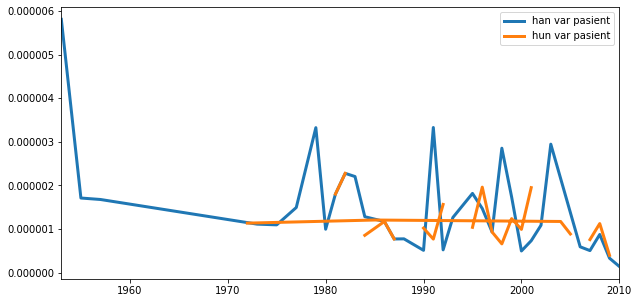

In [15]:
phrase('han','hun', lambda x: x + " var pasient")